### Importación de datos



In [221]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [222]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [223]:
tienda.info()
tienda2.info()
tienda3.info()
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [224]:
tiendas = [tienda, tienda2, tienda3, tienda4]

#1. Análisis de facturación



In [225]:
ingreso_total_por_tienda = []
for i, tienda in enumerate(tiendas):
    ingreso_total_por_tienda.append({
        'Tienda': f'Tienda {i + 1}',
        'Total Ventas': tienda['Precio'].sum().round(0).astype(int)
    })

df_ingreso_total = pd.DataFrame(ingreso_total_por_tienda)
df_ingreso_total

,Tienda,Total Ventas
0,Tienda 1,1150880400
1,Tienda 2,1116343500
2,Tienda 3,1098019600
3,Tienda 4,1038375700


# 2. Ventas por categoría

In [226]:
def ventas_por_categoria(tienda):
  serie_categorias = tienda['Categoría del Producto'].value_counts()
  df_categorias = serie_categorias.to_frame().reset_index()
  df_categorias.columns = ['Categoría Producto', 'Cantidad total']
  return df_categorias

In [227]:

df_categorias_tienda1 = ventas_por_categoria(tienda)
df_categorias_tienda2 = ventas_por_categoria(tienda2)
df_categorias_tienda3 = ventas_por_categoria(tienda3)
df_categorias_tienda4 = ventas_por_categoria(tienda4)

display(df_categorias_tienda1)
display(df_categorias_tienda2)
display(df_categorias_tienda3)
display(df_categorias_tienda4)

,Categoría Producto,Cantidad total
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


,Categoría Producto,Cantidad total
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


,Categoría Producto,Cantidad total
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177


,Categoría Producto,Cantidad total
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


# 3. Calificación promedio de la tienda


In [228]:
calificacion_promedio_por_tienda = []
for i, tienda in enumerate(tiendas):
    calificacion_promedio_por_tienda.append({
        'Tienda': f'Tienda {i + 1}',
        'Calificación Promedio': tienda['Calificación'].mean().round(2)
    })

df_calificacion_promedio = pd.DataFrame(calificacion_promedio_por_tienda)
df_calificacion_promedio

,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

## Más vendidos por tienda

In [229]:
def top3_por_tienda(tienda):
  serie_top3 = tienda.groupby('Producto')['Precio'].sum().round(0).astype(int).sort_values(ascending=False).head(3)
  df_top3 = serie_top3.to_frame().reset_index()
  df_top3.columns = ['Producto', 'Venta total']
  return df_top3

In [230]:
df_top3_tienda1 = top3_por_tienda(tienda)
df_top3_tienda2 = top3_por_tienda(tienda2)
df_top3_tienda3 = top3_por_tienda(tienda3)
df_top3_tienda4 = top3_por_tienda(tienda4)

display(df_top3_tienda1)
display(df_top3_tienda2)
display(df_top3_tienda3)
display(df_top3_tienda4)

,Producto,Venta total
0,Iphone 15,96697500
1,TV LED UHD 4K,90295300
2,Smart TV,82790400


,Producto,Venta total
0,Iphone 15,113225800
1,TV LED UHD 4K,103375000
2,Refrigerador,97632500


,Producto,Venta total
0,Refrigerador,99889700
1,TV LED UHD 4K,96669100
2,Iphone 15,93225700


,Producto,Venta total
0,Iphone 15,96697500
1,TV LED UHD 4K,90295300
2,Smart TV,82790400


## Más vendidos por tienda

In [231]:
def bottom3_por_tienda(tienda):
  serie_bottom3 = tienda.groupby('Producto')['Precio'].sum().round(0).astype(int).sort_values().head(3)
  df_bottom3 = serie_bottom3.to_frame().reset_index()
  df_bottom3.columns = ['Producto', 'Venta total']
  return df_bottom3

In [232]:
df_bottom3_tienda1 = bottom3_por_tienda(tienda)
df_bottom3_tienda2 = bottom3_por_tienda(tienda2)
df_bottom3_tienda3 = bottom3_por_tienda(tienda3)
df_bottom3_tienda4 = bottom3_por_tienda(tienda4)

display(df_bottom3_tienda1)
display(df_bottom3_tienda2)
display(df_bottom3_tienda3)
display(df_bottom3_tienda4)

,Producto,Venta total
0,Cuerda para saltar,704800
1,Cubo mágico 8x8,748400
2,Dinosaurio Rex,858100


,Producto,Venta total
0,Cubo mágico 8x8,643600
1,Dinosaurio Rex,770300
2,Cuerda para saltar,856900


,Producto,Venta total
0,Cubo mágico 8x8,640400
1,Dinosaurio Rex,795600
2,Cuerda para saltar,853800


,Producto,Venta total
0,Cuerda para saltar,704800
1,Cubo mágico 8x8,748400
2,Dinosaurio Rex,858100


# 5. Envío promedio por tienda

In [233]:
envio_total_por_tienda = []
for i, tienda in enumerate(tiendas):
    envio_total_por_tienda.append({
        'Tienda': f'Tienda {i + 1}',
        'Envio Promedio': tienda['Costo de envío'].mean().round(0).astype(int)
    })

df_envio_promedio = pd.DataFrame(envio_total_por_tienda)
df_envio_promedio

,Tienda,Envio Promedio
0,Tienda 1,26019
1,Tienda 2,25216
2,Tienda 3,24806
3,Tienda 4,23459


# 6. Gráficos

## a. Total de ventas por sucursal

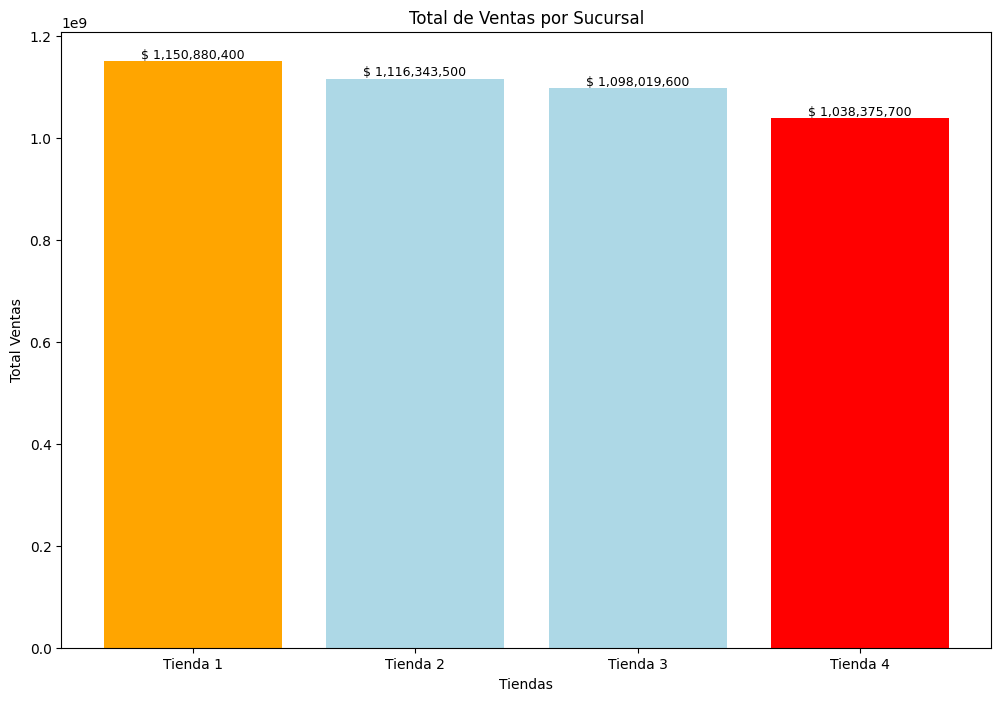

In [234]:
import matplotlib.pyplot as plt

# Encontrar index máximo 'Total Ventas'
tienda_max_ventas = df_ingreso_total['Total Ventas'].idxmax()
tienda_min_ventas = df_ingreso_total['Total Ventas'].idxmin()

# Lista de colores resaltando máxima venta
colores = ['lightblue'] * len(df_ingreso_total)
colores[tienda_max_ventas] = 'orange'
colores[tienda_min_ventas] = 'red'

# Generar gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(df_ingreso_total['Tienda'], df_ingreso_total['Total Ventas'], color=colores)

#Leyendas de cada valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'$ {yval:,.0f}', ha='center', va='bottom', fontsize=9, color='black')


# Etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Total Ventas')
plt.title('Total de Ventas por Sucursal')

# Mostrar gráfico
plt.show()

## b. Calificación promedio de la tienda

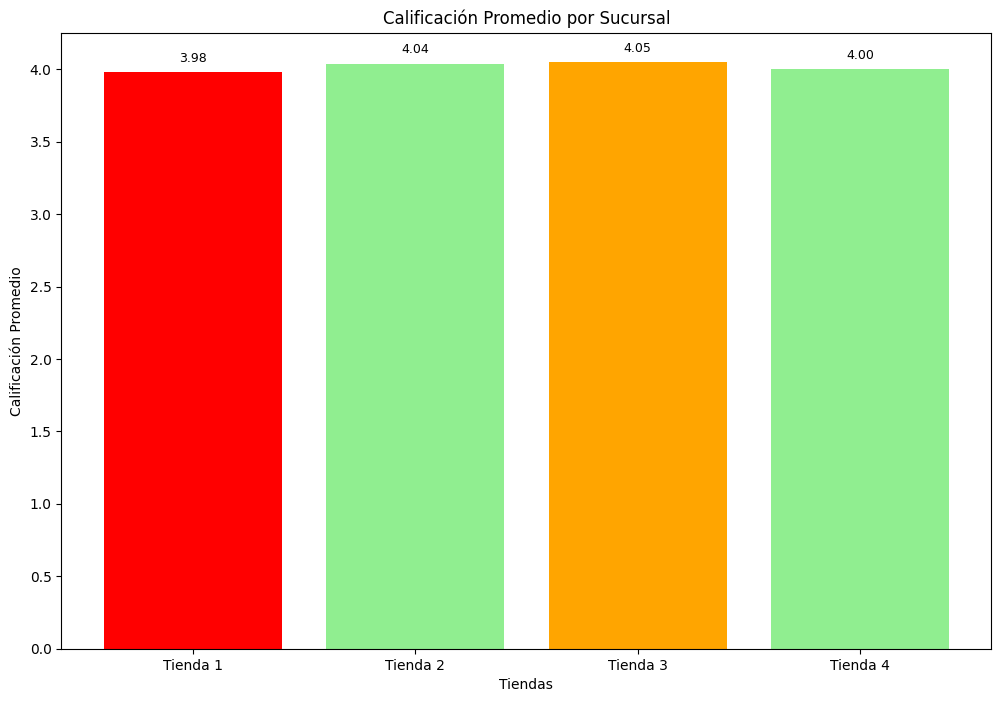

In [235]:
# Encontrar index máximo 'Total Ventas'
tienda_max_calificacion = df_calificacion_promedio['Calificación Promedio'].idxmax()
tienda_min_calificacion = df_calificacion_promedio['Calificación Promedio'].idxmin()

# Lista de colores resaltando máxima venta
colores = ['lightgreen'] * len(df_calificacion_promedio)
colores[tienda_max_calificacion] = 'orange'
colores[tienda_min_calificacion] = 'red'


# Generar gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(df_calificacion_promedio['Tienda'], df_calificacion_promedio['Calificación Promedio'], color=colores)

#Leyendas de cada valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=9, color='black')

# Etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Sucursal')

# Mostrar gráfico
plt.show()

## c. Envío promedio por tienda

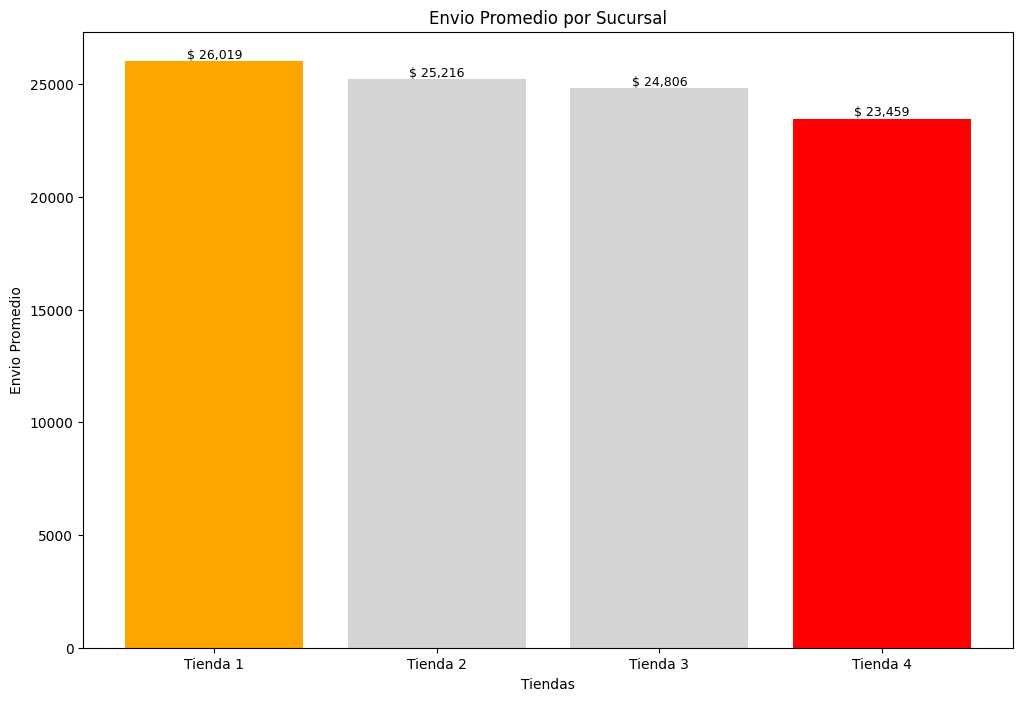

In [236]:
# Encontrar index máximo 'Total Ventas'
tienda_max_envio = df_envio_promedio['Envio Promedio'].idxmax()
tienda_min_envio = df_envio_promedio['Envio Promedio'].idxmin()

# Lista de colores resaltando máxima venta
colores = ['lightgray'] * len(df_calificacion_promedio)
colores[tienda_max_envio] = 'orange'
colores[tienda_min_envio] = 'red'


# Generar gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(df_envio_promedio['Tienda'], df_envio_promedio['Envio Promedio'], color=colores)

#Leyendas de cada valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'$ {yval:,.0f}', ha='center', va='bottom', fontsize=9, color='black')

# Etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Envio Promedio')
plt.title('Envio Promedio por Sucursal')

# Mostrar gráfico
plt.show()

# 7. Informe Final

## Introducción
El objetivo de este informe es analizar las métricas de rendimiento de cuatro tiendas (`Tienda 1`, `Tienda 2`, `Tienda 3`, `Tienda 4`) para identificar la opción menos eficiente y, por lo tanto, la más adecuada para que el Sr. Juan venda. Nos basaremos en ingresos totales, ventas por categoría, calificaciones promedio de clientes, productos más y menos vendidos, y costos de envío promedio. Este análisis proporcionará una base sólida para la toma de decisiones sobre la desinversión.

## Desarrollo

### a. Ingresos Totales
El análisis de los ingresos totales revela que las **Tiendas 1 y 4** generaron el menor volumen de ventas, idénticas, con \$1,038,375,700 cada una. Esto las sitúa significativamente por debajo de la **Tienda 2** (\$1,116,343,500) y la **Tienda 3** (\$1,098,019,600). Esta información se visualiza claramente en el gráfico 'Total de Ventas por Sucursal', donde Tienda 1 y Tienda 4 se muestran con los ingresos más bajos.

### b. Ventas por Categoría
En cuanto a las ventas por categoría, aunque `Muebles` y `Electrónicos` son consistentemente las categorías más vendidas en todas las tiendas, las **Tiendas 1 y 4** muestran patrones de venta similares que no logran alcanzar el volumen de las tiendas con mayores ingresos. Por ejemplo, en la **Tienda 1**, `Muebles` tuvo 480 ventas y `Electrónicos` 451, cifras comparables con Tienda 4 pero inferiores a la Tienda 3 en la categoría de Muebles. Las categorías menos vendidas, como `Libros` e `Instrumentos musicales`, también son consistentes en estas tiendas, sin una diferencia notable que las destaque positivamente.

### c. Calificación Promedio
Las **Tiendas 1 y 4** comparten la calificación promedio más baja, ambas con 4.00. Esto sugiere una menor satisfacción general del cliente en comparación con la **Tienda 3** (4.05) y la **Tienda 2** (4.04). Una calificación promedio más baja indica un posible problema con la experiencia del cliente o la calidad de los productos/servicios en estas sucursales, lo cual las hace menos atractivas. Esto se ilustra en el gráfico 'Calificación Promedio por Sucursal'.

### d. Productos Más y Menos Vendidos
Los productos más rentables en las **Tiendas 1 y 4** son `Iphone 15` y `TV LED UHD 4K`, lo cual es consistente con las otras tiendas. Sin embargo, a pesar de vender productos de alto valor, el volumen general de ventas no alcanza el de las tiendas de mayor rendimiento. Productos como `Cubo mágico 8x8`, `Cuerda para saltar` y `Dinosaurio Rex` se encuentran consistentemente entre los menos vendidos en estas sucursales, generando ingresos marginales.

### e. Costo de Envío Promedio
Las **Tiendas 1 y 4** registran el costo de envío promedio más bajo con $23,459. Si bien un costo de envío bajo podría interpretarse como una eficiencia operativa, en el contexto de ingresos totales y calificaciones de clientes más bajas, esto no es suficiente para compensar su bajo rendimiento general. Podría incluso sugerir que las tiendas no manejan volúmenes de envío que permitan economías de escala, o que su oferta de productos es de menor tamaño/peso en promedio, lo cual se alinea con menores ingresos totales. Esto se observa en el gráfico 'Envio Promedio por Sucursal'.

## Conclusión
Basándonos en el análisis integral, se recomienda al Sr. Juan que considere la **Tienda 1** (o la **Tienda 4**, dado que sus métricas son prácticamente idénticas) como la opción más adecuada para vender. Aunque estas tiendas tienen los costos de envío promedio más bajos, este factor no logra contrarrestar sus debilidades principales:

*   **Los ingresos totales más bajos:** Ambas tiendas registran la menor facturación, lo que indica una menor rentabilidad general.
*   **Las calificaciones promedio de clientes más bajas:** Esto sugiere una menor satisfacción del cliente, lo que puede afectar la reputación y el crecimiento a largo plazo.

La combinación de bajo volumen de ventas y menor satisfacción del cliente hace que la **Tienda 1** (y **Tienda 4**) sean las sucursales menos eficientes y, por lo tanto, las candidatas lógicas para ser desinvertidas. Liberar estos activos de bajo rendimiento podría permitir al Sr. Juan enfocar recursos en las tiendas más exitosas, como la **Tienda 2** y **Tienda 3**, que muestran un mejor balance entre ingresos y satisfacción del cliente.